In [1]:
%matplotlib inline

In [4]:
from sklearn import datasets
from sklearn import cluster
import matplotlib.pyplot as plt

In [5]:
blobs, ground_truth = datasets.make_blobs(1000, centers=3,
                                         cluster_std=1.75)

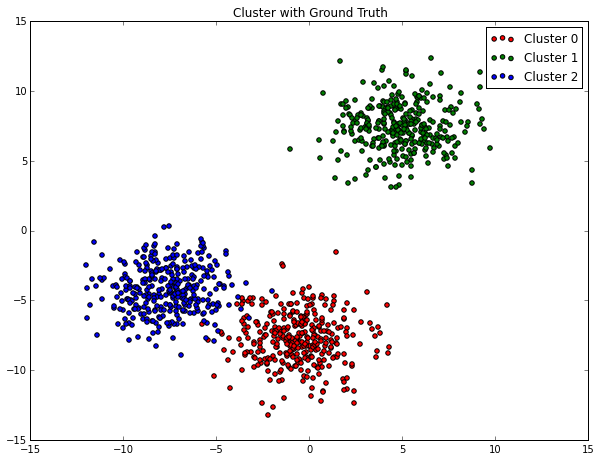

In [8]:
f, ax = plt.subplots(figsize=(10,7.5))
colors = ['r', 'g', 'b']
for i in range(3):
    p = blobs[ground_truth == i]
    ax.scatter(p[:,0], p[:,1], c=colors[i],
               label = 'Cluster {}'.format(i))
ax.set_title('Cluster with Ground Truth')
ax.legend(loc='best')

In [9]:
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(blobs)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [10]:
kmeans.cluster_centers_

array([[-0.59589408, -7.76309105],
       [ 4.89658628,  7.42787561],
       [-7.6649924 , -4.18354287]])

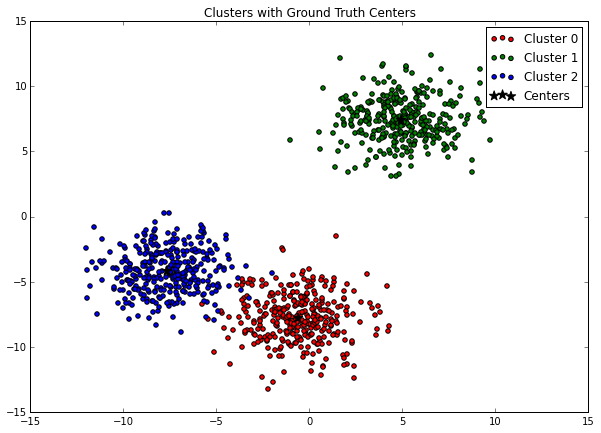

In [11]:
f, ax = plt.subplots(figsize=(10, 7))
for i in range(3):
    p = blobs[ground_truth==i]
    ax.scatter(p[:,0], p[:,1], c=colors[i],
              label='Cluster {}'.format(i))
ax.scatter(kmeans.cluster_centers_[:, 0],
          kmeans.cluster_centers_[:, 1], s=100, color='black',
          label='Centers', marker='*')
ax.set_title('Clusters with Ground Truth Centers')
ax.legend(loc='best')

In [12]:
for i in range(3):
    print(kmeans.labels_ == ground_truth)[ground_truth == i].astype(int).mean()

0.988023952096
1.0
0.990990990991


In [13]:
new_ground_truth = ground_truth.copy()
new_ground_truth[ground_truth == 0] = 2
new_ground_truth[ground_truth == 2] = 0

In [15]:
for i in range(3):
    print(kmeans.labels_ == new_ground_truth)[ground_truth == i].astype(int).mean()

0.0119760479042
1.0
0.00900900900901
